# Classifiers

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('output.csv')

# Show general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         164 non-null    object 
 1   price           164 non-null    float64
 2   weight          164 non-null    float64
 3   star_rating     164 non-null    float64
 4   total_comments  164 non-null    float64
 5   adult           164 non-null    float64
 6   chicken         164 non-null    float64
 7   wet             164 non-null    float64
 8   from_oceon      164 non-null    float64
 9   salmon          164 non-null    float64
 10  mackerel        164 non-null    float64
 11  can             164 non-null    float64
 12  gravy           164 non-null    float64
 13  vegan           164 non-null    float64
dtypes: float64(13), object(1)
memory usage: 18.1+ KB


In [4]:
row = ['whiskas', 'farmina', 'me-o', 'royal', 'purepet', 'purina', 'meat', 'sheba']

# Step 1: Use the Pandas 'get_dummies' function for one-hot encoding
df = pd.get_dummies(df[df.company.isin(row)], columns=['company'])

df.shape

(121, 21)

In [5]:
# Define the threshold
threshold = 4.5

# Function to apply the threshold and create the new column
def binary_column(row):
    if row['star_rating'] >= threshold:
        return 1
    else:
        return 0

# Apply the function to create the new binary column
df['yummy'] = df.apply(binary_column, axis=1)

# Display the new column
df.yummy

0      0
1      0
2      1
4      0
6      1
      ..
154    0
156    1
157    0
159    1
161    0
Name: yummy, Length: 121, dtype: int64

In [6]:
# Assuming "yummy" is the column of interest
counts = df['yummy'].value_counts()

# Print the counts
print("Counts of '0' and '1' in the 'yummy' column:")
print(counts)

Counts of '0' and '1' in the 'yummy' column:
0    64
1    57
Name: yummy, dtype: int64


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame 'df' with numerical columns to scale
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with scaled data
df = pd.DataFrame(scaled_data, columns=df.columns)

# Display the scaled DataFrame
df.head(2)

,price,weight,star_rating,total_comments,adult,chicken,wet,from_oceon,salmon,mackerel,...,vegan,company_farmina,company_me-o,company_meat,company_purepet,company_purina,company_royal,company_sheba,company_whiskas,yummy
0,0.022888,0.113797,0.60,0.638163,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.128879,0.697885,0.65,0.904091,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.model_selection import train_test_split

# Step 1: Prepare the data
# Assuming 'yummy' is the target column, and you have other columns as features
X = df.drop(['star_rating','yummy'], axis='columns')  # Features
y = df['yummy']  # Target variable ('yummy')

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create and train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Step 3: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Step 4: Print the evaluation results
print("Accuracy:", accuracy)
print("Train Accuracy:", accuracy_score(y_train, nb_classifier.predict(X_train)))
print("Confusion Matrix:\n", confusion)

Accuracy: 0.72
Train Accuracy: 0.59375
Confusion Matrix:
 [[ 8  7]
 [ 0 10]]


## Logistic regression

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Step 1: Create a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Step 2: Train the classifier on the training data
logistic_regression_classifier.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = logistic_regression_classifier.predict(X_test)

# Step 4: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Step 5: Print the evaluation results
print("Accuracy:", accuracy)
#print("Train Accuracy:", accuracy_score(y_train, logistic_regression_classifier.predict(X_train)))
print("Confusion Matrix:\n", confusion)

Accuracy: 0.72
Confusion Matrix:
 [[12  3]
 [ 4  6]]


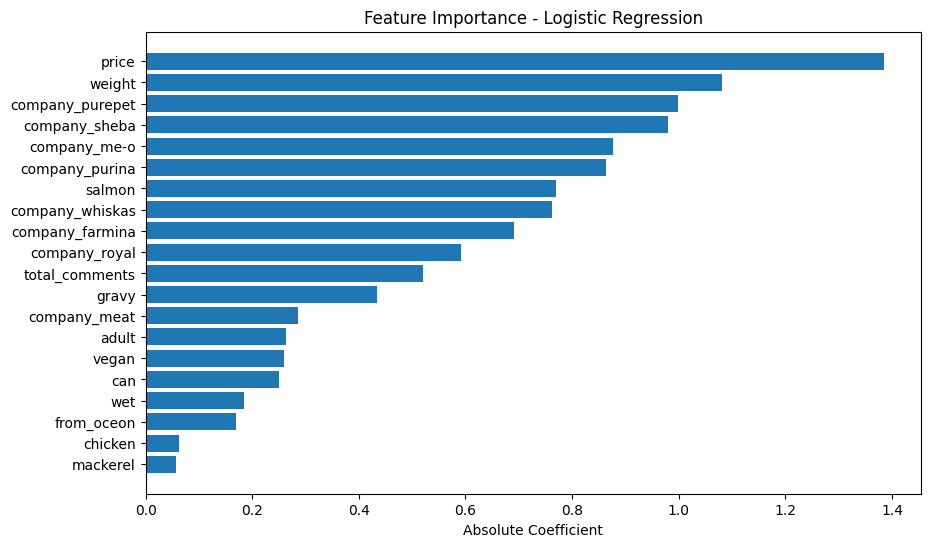

In [11]:
import matplotlib.pyplot as plt
# Assuming you have already trained a Logistic Regression classifier and stored it in 'logreg_classifier'

# Get the feature names (column names) from your DataFrame
feature_names = X_train.columns  # Replace with your feature DataFrame (X_train)

# Get the coefficients (importance) of each feature
coefficients = logistic_regression_classifier.coef_[0]

# Create a DataFrame to store feature names and their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by their absolute coefficients to display the most important ones
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
sorted_coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_coef_df['Feature'], sorted_coef_df['Absolute_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create a KNN classifier
k = 3  # Replace with your desired number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Step 2: Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Step 4: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Step 5: Print the evaluation results
print("Accuracy:", accuracy)
#print("Train Accuracy:", accuracy_score(y_train, knn_classifier.predict(X_train)))
print("Confusion Matrix:\n", confusion)

Accuracy: 0.84
Confusion Matrix:
 [[11  4]
 [ 0 10]]


## SVM

In [13]:
from sklearn.svm import SVC

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create an SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can choose a different kernel: 'linear', 'sigmoid', 'rbf', 'poly'

# Step 2: Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Step 4: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Step 5: Print the evaluation results
print("Accuracy:", accuracy)
#print("Train Accuracy:", accuracy_score(y_train, svm_classifier.predict(X_train)))
print("Confusion Matrix:\n", confusion)

Accuracy: 0.92
Confusion Matrix:
 [[13  2]
 [ 0 10]]


## Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 1: Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Step 2: Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Step 4: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Step 5: Print the evaluation results
print("Accuracy:", accuracy)
print("Train Accuracy:", accuracy_score(y_train, dt_classifier.predict(X_train)))
print("Confusion Matrix:\n", confusion)

Accuracy: 0.68
Train Accuracy: 1.0
Confusion Matrix:
 [[11  4]
 [ 4  6]]


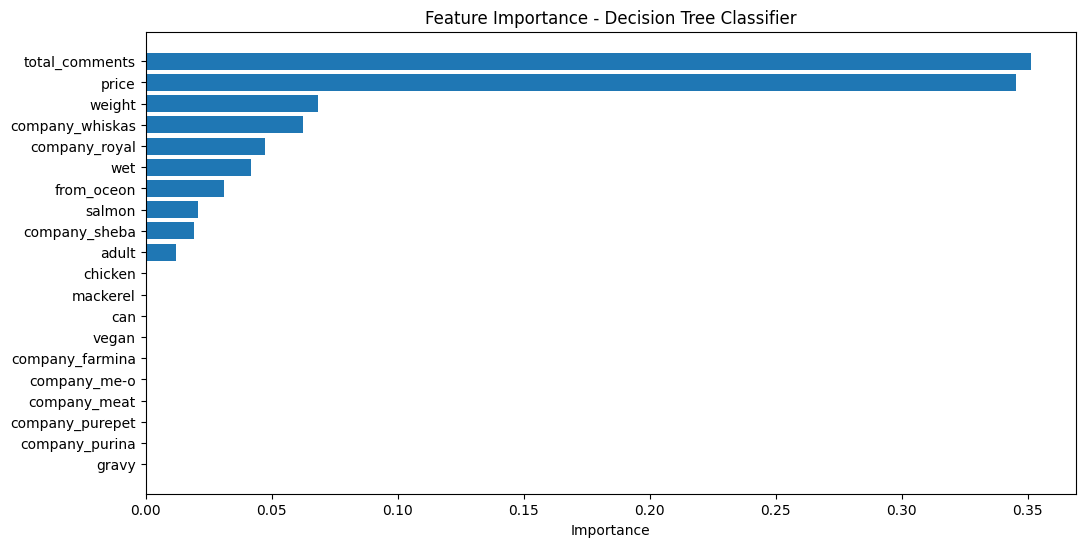

In [15]:
# Assuming you have already trained a Decision Tree classifier and stored it in 'dt_classifier'

# Get the feature names (column names) from your DataFrame
feature_names = X_train.columns  # Replace with your feature DataFrame (X_train)

# Get the feature importances from the trained Decision Tree classifier
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by their importances in descending order to display the most important ones
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(sorted_importance_df['Feature'], sorted_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree Classifier')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

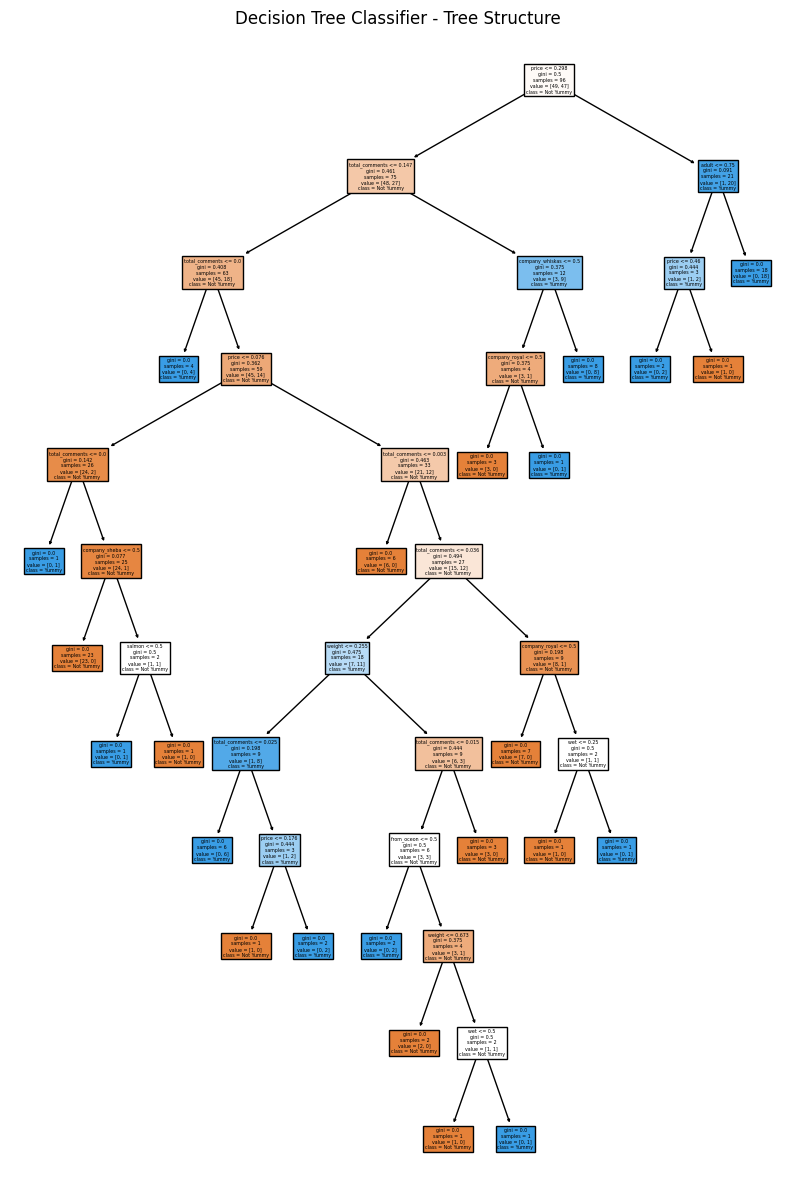

In [16]:
from sklearn.tree import plot_tree

# Display the tree structure
plt.figure(figsize=(10, 15))  # Adjust the figure size as needed
plot_tree(dt_classifier, filled=True, feature_names=feature_names, class_names=['Not Yummy', 'Yummy'])
plt.title("Decision Tree Classifier - Tree Structure")
plt.show()

In [17]:
df.to_csv('output_classifiers.csv', index=False)

In [32]:
import tensorflow as tf

# Define the architecture of the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
3/3 [==============================] - 0s 53ms/step - loss: 0.6941 - accuracy: 0.5104 - val_loss: 0.6383 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6759 - accuracy: 0.5208 - val_loss: 0.6344 - val_accuracy: 0.6400
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6592 - accuracy: 0.6146 - val_loss: 0.6308 - val_accuracy: 0.6800
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6483 - accuracy: 0.6875 - val_loss: 0.6281 - val_accuracy: 0.8000
Epoch 5/100
3/3 [==============================] - 0s 47ms/step - loss: 0.6361 - accuracy: 0.7812 - val_loss: 0.6233 - val_accuracy: 0.8400
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6269 - accuracy: 0.7292 - val_loss: 0.6175 - val_accuracy: 0.8400
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6177 - accuracy: 0.7396 - val_loss: 0.6106 - val_accuracy: 0.8400
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 16ms/step - loss: 0.2804 - accuracy: 0.9062 - val_loss: 0.5183 - val_accuracy: 0.8000
Epoch 60/100
3/3 [==============================] - 0s 14ms/step - loss: 0.2775 - accuracy: 0.9062 - val_loss: 0.5229 - val_accuracy: 0.8000
Epoch 61/100
3/3 [==============================] - 0s 9ms/step - loss: 0.2734 - accuracy: 0.9062 - val_loss: 0.5283 - val_accuracy: 0.8000
Epoch 62/100
3/3 [==============================] - 0s 9ms/step - loss: 0.2695 - accuracy: 0.9062 - val_loss: 0.5338 - val_accuracy: 0.8000
Epoch 63/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2673 - accuracy: 0.9062 - val_loss: 0.5383 - val_accuracy: 0.8000
Epoch 64/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2626 - accuracy: 0.9167 - val_loss: 0.5446 - val_accuracy: 0.8000
Epoch 65/100
3/3 [==============================] - 0s 16ms/step - loss: 0.2602 - accuracy: 0.9167 - val_loss: 0.5500 - val_accuracy: 0.8000
Epoch 66/100
3/3 [============

In [33]:
from sklearn.metrics import confusion_matrix

# Predict on test data
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype('int')  # Convert probabilities to binary predictions

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

1/1 [==============================] - 0s 29ms/step
Confusion Matrix:
[[12  3]
 [ 1  9]]


In [34]:
print("Test Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.8399999737739563
Confusion Matrix:
[[12  3]
 [ 1  9]]
